# Firstly we import packages and load data 📚


In [305]:
import pandas as pd
import re 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()#To set seaborn style
import plotly.express as p

In [306]:
df=pd.read_excel('population_total.xlsx')
year=df.columns.unique()[1:]
df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,...,315k,314k,314k,314k,313k,313k,312k,312k,311k,310k
193,Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,54.5M,54.4M,54.3M,54.1M,54M,53.8M,53.7M,53.5M,53.4M,53.2M
194,South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,...,79.8M,79.8M,79.7M,79.7M,79.6M,79.5M,79.5M,79.4M,79.3M,79.2M
195,Zambia,747k,758k,770k,782k,794k,806k,818k,831k,843k,...,74.4M,75.2M,76M,76.8M,77.6M,78.4M,79.2M,80M,80.8M,81.5M


# 2- Data Wrangling 🔎🧹

# Summary of data Wrangling Steps we will do🧹 :- 


### Step 1: Read Excel file and Extract Unique Years

```python
import pandas as pd

# Read the Excel file
df = pd.read_excel('population_total.xlsx')

# Extract unique years from column headers
years = df.columns.unique()[1:]
```
### Step 2: Transpose the DataFrame
```python
df = df.T
# Reset the index to make the current index a regular column
df.reset_index(drop=True, inplace=True)
```
### Step 3: Set First Row as Column Headers
```python
# Set the first row as column headers
df.columns = df.iloc[0]
df = df[1:]
```
### Step 4: Add `year` Column & changing the dt for object columns to be float
```python
# Add 'year' column extracted from unique years
df['year'] = years
df[object_columns.columns] = object_columns.astype('float64')

```
### Finally resulting DataFrame
- The resulting DataFrame will have columns representing countries, rows containing data for each year, and an additional 'year' column.

In [307]:
df=df.T

In [308]:
df.reset_index(drop=True, inplace=True)

# first row as column headers
df.columns = df.iloc[0]
df = df[1:]
df

,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1,3.28M,1.57M,400k,2650,40.2k,534k,413k,37k,200k,3M,...,1.92M,25.8k,1M,4M,27.8k,47.3k,2.59M,1.45M,747k,1.09M
2,3.28M,1.57M,402k,2650,40.2k,520k,413k,37k,205k,3.02M,...,1.92M,25.8k,978k,4.1M,27.8k,47.3k,2.59M,1.45M,758k,1.09M
3,3.28M,1.57M,404k,2650,40.2k,506k,413k,37k,211k,3.04M,...,1.92M,25.8k,957k,4.2M,27.8k,47.3k,2.59M,1.46M,770k,1.09M
4,3.28M,1.57M,405k,2650,40.2k,492k,413k,37k,216k,3.05M,...,1.92M,25.8k,936k,4.31M,27.8k,47.3k,2.59M,1.46M,782k,1.09M
5,3.28M,1.57M,407k,2650,40.2k,479k,413k,37k,222k,3.07M,...,1.92M,25.8k,916k,4.41M,27.8k,47.3k,2.59M,1.47M,794k,1.09M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,75.8M,179M,1.19M,62.7k,12.7M,57.2M,2.1M,103k,42.1M,8.66M,...,42.7M,77.7k,34.8M,98.8M,942k,313k,53.8M,79.5M,78.4M,30.9M
298,75.6M,182M,1.17M,62.6k,12.7M,57.1M,2.09M,103k,42.3M,8.66M,...,42.6M,76.9k,34.7M,98.4M,949k,312k,53.7M,79.5M,79.2M,31M
299,75.4M,184M,1.14M,62.5k,12.8M,57M,2.07M,103k,42.5M,8.67M,...,42.5M,76.1k,34.5M,98.1M,955k,312k,53.5M,79.4M,80M,31M
300,75.2M,186M,1.11M,62.5k,12.8M,56.9M,2.05M,102k,42.7M,8.67M,...,42.4M,75.4k,34.4M,97.8M,962k,311k,53.4M,79.3M,80.8M,31M


In [309]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 1 to 301
Data columns (total 197 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    Afghanistan                     301 non-null    object
 1    Angola                          301 non-null    object
 2    Albania                         301 non-null    object
 3    Andorra                         301 non-null    object
 4    United Arab Emirates            301 non-null    object
 5    Argentina                       301 non-null    object
 6    Armenia                         301 non-null    object
 7    Antigua and Barbuda             301 non-null    object
 8    Australia                       301 non-null    object
 9    Austria                         301 non-null    object
 10   Azerbaijan                      301 non-null    object
 11   Burundi                         301 non-null    object
 12   Belgium                         30

In [310]:
df['year']=year
df

,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe,year
1,3.28M,1.57M,400k,2650,40.2k,534k,413k,37k,200k,3M,...,25.8k,1M,4M,27.8k,47.3k,2.59M,1.45M,747k,1.09M,1800
2,3.28M,1.57M,402k,2650,40.2k,520k,413k,37k,205k,3.02M,...,25.8k,978k,4.1M,27.8k,47.3k,2.59M,1.45M,758k,1.09M,1801
3,3.28M,1.57M,404k,2650,40.2k,506k,413k,37k,211k,3.04M,...,25.8k,957k,4.2M,27.8k,47.3k,2.59M,1.46M,770k,1.09M,1802
4,3.28M,1.57M,405k,2650,40.2k,492k,413k,37k,216k,3.05M,...,25.8k,936k,4.31M,27.8k,47.3k,2.59M,1.46M,782k,1.09M,1803
5,3.28M,1.57M,407k,2650,40.2k,479k,413k,37k,222k,3.07M,...,25.8k,916k,4.41M,27.8k,47.3k,2.59M,1.47M,794k,1.09M,1804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,75.8M,179M,1.19M,62.7k,12.7M,57.2M,2.1M,103k,42.1M,8.66M,...,77.7k,34.8M,98.8M,942k,313k,53.8M,79.5M,78.4M,30.9M,2096
298,75.6M,182M,1.17M,62.6k,12.7M,57.1M,2.09M,103k,42.3M,8.66M,...,76.9k,34.7M,98.4M,949k,312k,53.7M,79.5M,79.2M,31M,2097
299,75.4M,184M,1.14M,62.5k,12.8M,57M,2.07M,103k,42.5M,8.67M,...,76.1k,34.5M,98.1M,955k,312k,53.5M,79.4M,80M,31M,2098
300,75.2M,186M,1.11M,62.5k,12.8M,56.9M,2.05M,102k,42.7M,8.67M,...,75.4k,34.4M,97.8M,962k,311k,53.4M,79.3M,80.8M,31M,2099


In [311]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: x.strip().upper() if isinstance(x, str) else x)

In [312]:
# Replacing 'k' with '000' and 'M' with '000000' for numerical columns
df.iloc[:, :] = df.iloc[:, :].replace({'K': '000', 'M': '000000',"B":'0000000000'}, regex=True)

# # Converting the columns to numeric after replacing strings
# df.iloc[:, :] = df.iloc[:, :].apply(pd.to_numeric)

In [313]:
df

,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe,year
1,3.28000000,1.57000000,400000,2650,40.2000,534000,413000,37000,200000,3000000,...,25.8000,1000000,4000000,27.8000,47.3000,2.59000000,1.45000000,747000,1.09000000,1800
2,3.28000000,1.57000000,402000,2650,40.2000,520000,413000,37000,205000,3.02000000,...,25.8000,978000,4.1000000,27.8000,47.3000,2.59000000,1.45000000,758000,1.09000000,1801
3,3.28000000,1.57000000,404000,2650,40.2000,506000,413000,37000,211000,3.04000000,...,25.8000,957000,4.2000000,27.8000,47.3000,2.59000000,1.46000000,770000,1.09000000,1802
4,3.28000000,1.57000000,405000,2650,40.2000,492000,413000,37000,216000,3.05000000,...,25.8000,936000,4.31000000,27.8000,47.3000,2.59000000,1.46000000,782000,1.09000000,1803
5,3.28000000,1.57000000,407000,2650,40.2000,479000,413000,37000,222000,3.07000000,...,25.8000,916000,4.41000000,27.8000,47.3000,2.59000000,1.47000000,794000,1.09000000,1804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,75.8000000,179000000,1.19000000,62.7000,12.7000000,57.2000000,2.1000000,103000,42.1000000,8.66000000,...,77.7000,34.8000000,98.8000000,942000,313000,53.8000000,79.5000000,78.4000000,30.9000000,2096
298,75.6000000,182000000,1.17000000,62.6000,12.7000000,57.1000000,2.09000000,103000,42.3000000,8.66000000,...,76.9000,34.7000000,98.4000000,949000,312000,53.7000000,79.5000000,79.2000000,31000000,2097
299,75.4000000,184000000,1.14000000,62.5000,12.8000000,57000000,2.07000000,103000,42.5000000,8.67000000,...,76.1000,34.5000000,98.1000000,955000,312000,53.5000000,79.4000000,80000000,31000000,2098
300,75.2000000,186000000,1.11000000,62.5000,12.8000000,56.9000000,2.05000000,102000,42.7000000,8.67000000,...,75.4000,34.4000000,97.8000000,962000,311000,53.4000000,79.3000000,80.8000000,31000000,2099


In [314]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 1 to 301
Data columns (total 198 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    Afghanistan                     301 non-null    object
 1    Angola                          301 non-null    object
 2    Albania                         301 non-null    object
 3    Andorra                         301 non-null    object
 4    United Arab Emirates            301 non-null    object
 5    Argentina                       301 non-null    object
 6    Armenia                         301 non-null    object
 7    Antigua and Barbuda             301 non-null    object
 8    Australia                       301 non-null    object
 9    Austria                         301 non-null    object
 10   Azerbaijan                      301 non-null    object
 11   Burundi                         301 non-null    object
 12   Belgium                         30

In [315]:
object_columns = df.select_dtypes(include='object')

# Convert the selected columns to float
df[object_columns.columns] = object_columns.astype('float64')

In [316]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 1 to 301
Data columns (total 198 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    Afghanistan                     301 non-null    float64
 1    Angola                          301 non-null    float64
 2    Albania                         301 non-null    float64
 3    Andorra                         301 non-null    float64
 4    United Arab Emirates            301 non-null    float64
 5    Argentina                       301 non-null    float64
 6    Armenia                         301 non-null    float64
 7    Antigua and Barbuda             301 non-null    float64
 8    Australia                       301 non-null    float64
 9    Austria                         301 non-null    float64
 10   Azerbaijan                      301 non-null    float64
 11   Burundi                         301 non-null    float64
 12   Belgium             

In [317]:
df.isna().sum()

0
Afghanistan             0
Angola                  0
Albania                 0
Andorra                 0
United Arab Emirates    0
                       ..
Yemen                   0
South Africa            0
Zambia                  0
Zimbabwe                0
year                    0
Length: 198, dtype: int64

# Now Our data is ready for Exploratery Data Analysis `EDA` 🔎
### Questions to answer :- 
- How have the total populations of the top countries changed over a specific range of years?
- Which countries have shown the highest and lowest population growth rates over the available years?

In [318]:
top_countries = df.sum().nlargest(10).index.tolist()
filtered_data = df[df['year'].between(2000, 2020)][['year'] + top_countries]

# Grouping by 'year'
grouped_data = filtered_data.groupby('year').sum()

# create an interactive line plot
fig = px.line(grouped_data, x=grouped_data.index, y=top_countries,
              labels={'year': 'Year', 'value': 'Population'}, 
              title='Population Trends Over Time for Top Countries from 2000-2020')

# Display country names
fig.update_traces(mode='lines+markers', hovertemplate='<b>%{y}</b><br>Country: %{legendgroup}')
fig.show()


### For First Question Observations from the Population Trends Graph:

- **Ethiopia's Rapid Increase:** Most of the top 10 populated countries exhibited a consistent increase in population over time. However, Ethiopia's population showed a notably rapid increase from 2014 to 2020. This unusual rise might be attributed to various factors or significant events during that period.

- **Russia and Brazil's Decrease:** On the contrary, both Russia and Brazil experienced a modest decrease in their population, although visible, it was relatively small compared to the overall trends of other countries.

- **Stability of India:** India's population remained relatively stable throughout the observed period from 2000 to 2020. Unlike many other nations, India didn't exhibit significant fluctuations or notable increases during this time span.

These observations provide an interesting insight into the differing population dynamics among the top countries, with Ethiopia's rapid increase, Russia and Brazil's minor declines, and India's relatively stable population trend.


In [326]:
# percentage change in population for each country
population_change = df.set_index('year').pct_change(fill_method=None) * 100

# mean percentage change for each country for available years
mean_population_change = population_change.mean()

#top-growing and top-declining countries
top_growing = mean_population_change.nlargest(5)
top_declining = mean_population_change.nsmallest(5)

print("Top Growing")
print(top_growing)
print("\nTop Declinin")
print(top_declining)


Top Growing
0
Ukraine           1.103297e+07
Spain             9.030853e+06
United Kingdom    8.405329e+06
Italy             8.353275e+06
Poland            8.016485e+06
dtype: float64

Top Declinin
0
Holy See   -0.038196
Austria     0.019916
Ireland     0.032278
Bhutan      0.195881
Cyprus      0.320645
dtype: float64


#### The `pct_change` is function calculates the percentage change between the current and previous elements in a DataFrame or Series. It's useful for analyzing the rate of change over time or across different data points so that help us in our the second question.

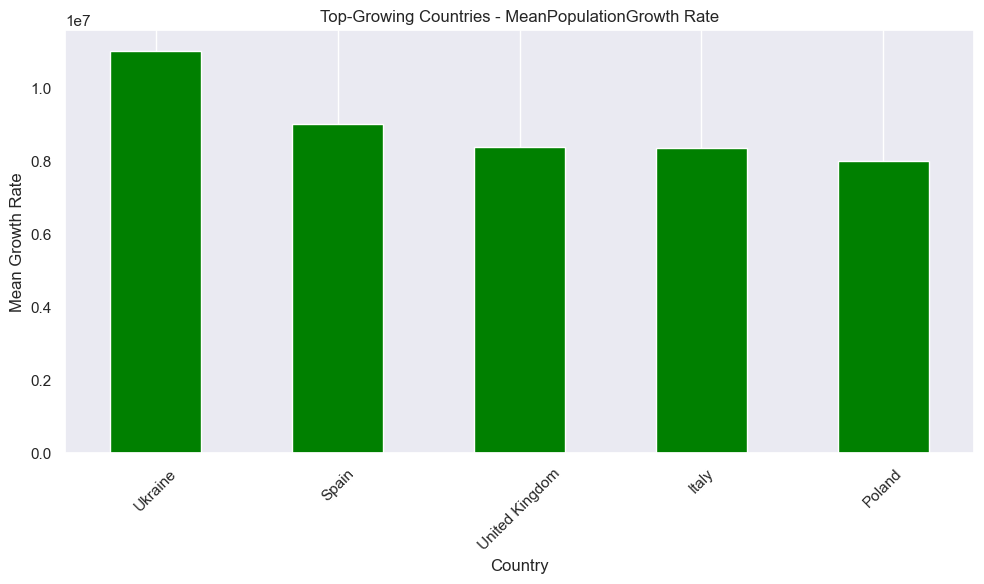

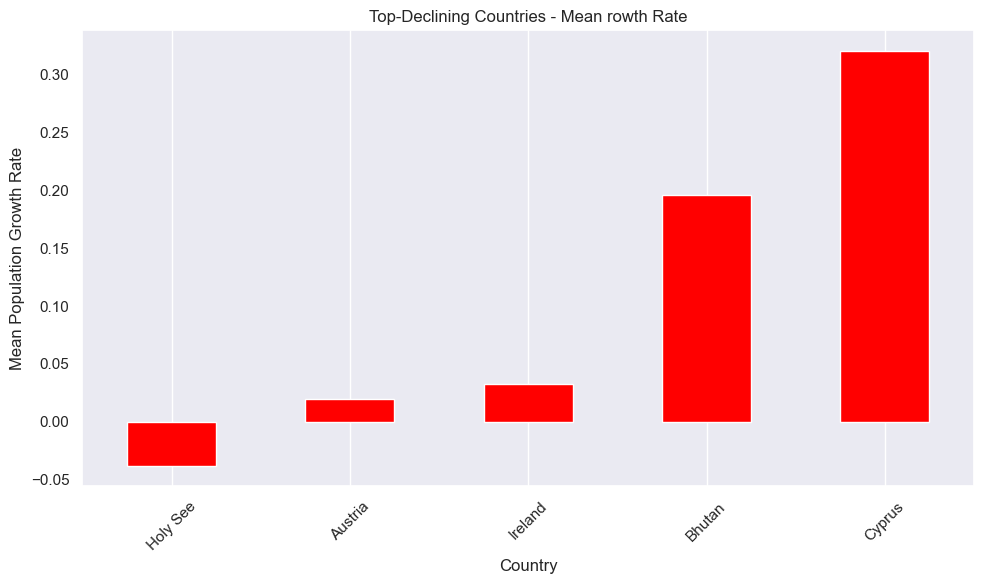

In [328]:
plt.figure(figsize=(10, 6))
top_growing.plot(kind='bar', color='green')
plt.title('Top-Growing Countries - MeanPopulationGrowth Rate')
plt.xlabel('Country')
plt.ylabel('Mean Growth Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# for top-declining countries
plt.figure(figsize=(10, 6))
top_declining.plot(kind='bar', color='red')
plt.title('Top-Declining Countries - Mean rowth Rate')
plt.xlabel('Country')
plt.ylabel('Mean Population Growth Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Population Growth Analysis For the second Question :- 

### Top-Growing Countries
From the visualizations showcasing mean population growth rates among top countries, the highest observed mean population growth rate was for **Ukraine**. Following closely, **Spain** displayed the second-highest growth rate. Additionally, the growth rates of **United Kingdom**, **Italy**, and **Poland** appeared relatively similar, indicating comparable growth patterns.

### Top-Declining Countries
Among the top-declining countries, **Austria** exhibited the smallest growth rate, while **Ireland** showed the second-lowest rate. Notably, **Cyprus** experienced the highest increasing among the top-declining countries, signifying a substantial reduction in population over the available years.



In [ ]:
##################################################################

## Conclusion

The Population Growth Analysis unveils diverse trends among top countries, showcasing distinct patterns in their population dynamics over the observed years.

- **Ukraine and Spain's High Growth:** Ukraine stands out with the highest mean population growth rate, closely followed by Spain, indicating significant population expansion trends. This suggests potential factors fostering rapid growth in these countries.

- **Consistent Growth Patterns:** Countries like the United Kingdom, Italy, and Poland demonstrate relatively consistent and comparable growth rates. Their stable growth patterns hint at consistent population dynamics over time.

- **Top-Declining Countries:** Austria exhibited the smallest growth rate among the declining nations, while Ireland showed a slightly higher decline. Cyprus experienced a substantial reduction in population, signifying a unique demographic change in these nations.

### Population Trends Insights

- **Ethiopia's Rapid Increase:** Ethiopia displayed an exceptional surge in population from 2014 to 2020, deviating significantly from the trends observed in other top countries. This rapid increase might stem from specific socio-economic factors or transformative events within the country during this period.

- **Russia and Brazil's Minor Decline:** While most countries showcased population growth, Russia and Brazil experienced marginal decreases. These declines, albeit visible, were relatively modest compared to the overall trends observed in other nations.

- **Stability of India:** India's population remained relatively stable across the observed period from 2000 to 2020. Unlike many other nations with visible fluctuations, India's population displayed steadiness without significant peaks or declines.
